In [5]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [6]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream.txt'

In [7]:
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'ice_cream.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'ice_cream.txt') # Python 3 の場合

('ice_cream.txt', <http.client.HTTPMessage at 0x1ce58e5be10>)

In [8]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('ice_cream.txt',encoding='utf-8')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split() # 行を空白文字で分割したものをcというリストに入れる
    col1.append(int(c[0])) # ０列目の単語を整数に変換してcol1に入れる
    col2.append(int(c[1])) # １列目の単語を整数に変換してcol2に入れる
    col3.append(int(c[2])) # ２列目の単語を整数に変換してcol3に入れる

<h4 style="border-bottom: solid 1px black;">折れ線グラフを描こう</h4>

入力したデータを使って、以下のコードを実行して折れ線グラフを描いてください。

In [9]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

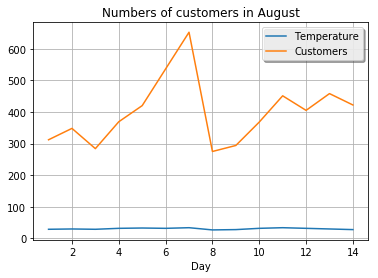

In [10]:
# 折れ線グラフを描く。
plt.plot(col1, col2, label="Temperature")
plt.plot(col1, col3, label="Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.title("Numbers of customers in August")
plt.xlabel("Day")
plt.grid()
plt.show()

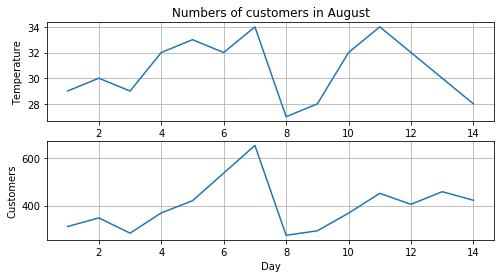

In [11]:
# 折れ線グラフを２つのサブプロットで描く。
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.plot(col1, col2)
plt.title('Numbers of customers in August')
#plt.xticks([])
#plt.xlabel('Day')
plt.ylabel('Temperature')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(col1, col3)
#plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Customers')
plt.grid()

plt.show()

<h4 style="border-bottom: solid 1px black;">散布図を描こう</h4>

以下のコードを実行してください。

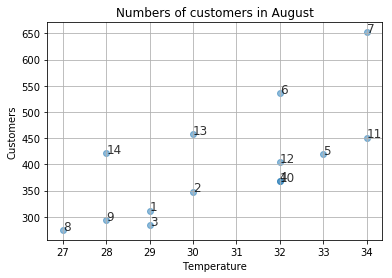

In [12]:
#散布図を描く。
plt.scatter(col2, col3, alpha=0.5)
plt.title("Numbers of customers in August")
plt.xlabel("Temperature")
plt.ylabel("Customers")
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.show()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題1.4</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt) をダウンロードし、散布図を描いてください。その上で、駅から250メートルの店の客数を予測してください。

In [13]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
urllib.request.urlretrieve(url, 'icecream2.txt')

('icecream2.txt', <http.client.HTTPMessage at 0x1ce59b27978>)

In [14]:
col1 = []
col2 = []
col3 = []
for i, line in enumerate(open('icecream2.txt', encoding='utf-8')):
    if i == 0:
        continue
    num = [int(x) for x in line.split(' ')]
    col1.append(num[0])
    col2.append(num[1])
    col3.append(num[2])

In [15]:
import numpy as np
x = np.array([col2, np.ones(len(col2))]).T
y = np.array(col3)
m, c = np.linalg.lstsq(x, y)[0]
print(m,c)

-0.476140442984 755.34959721


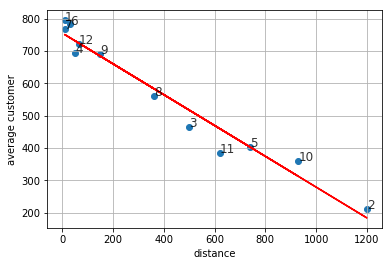

In [16]:
plt.scatter(col2,col3)
plt.plot(x, m*x+c, 'r')
plt.xlabel('distance')
plt.ylabel('average customer')
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.grid()
plt.show()

250メートル予測は線形関係で

In [17]:
m * 250 + 755.349

636.31388925404588